In [ ]:
# Copyright (c) 2020 ETH Zurich, Xiaying Wang, Michael Hersche, Michele Magno, and Luca Benini

In [1]:
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.rc('axes', axisbelow=True)
import numpy as np
import os

In [6]:
num_classes=2

In [7]:
# plot global model results 
def plot_channels_acc(path,num_classes,n_ds,n_ch_list,T, n_epochs, same_folds=False, log=False):
    
    train_acc=[]
    val_acc=[]
    n_ch_list.sort()
    for n_ch in n_ch_list:
    
        all_acc = np.zeros((5,4,n_epochs))
        for split_ctr in range(5):
            if same_folds:
                file = '{:}/stats/global_class_{:}_ds{:}_nch{:}cs_T{}_split_{:}.csv'.format(path,num_classes,n_ds,n_ch,T,split_ctr)
            else:
                file = '{:}/stats/global_class_{:}_ds{:}_nch{:}_T{}_split_{:}.csv'.format(path,num_classes,n_ds,n_ch,T,split_ctr)
            #print(all_acc.shape)
            all_acc[split_ctr] = np.transpose(np.genfromtxt(file, delimiter=' '))
        
        train_acc.append(100*all_acc[:,0,-1].mean())
        val_acc.append(100*all_acc[:,1,-1].mean())

    fig, ax = plt.subplots(figsize=(18,8))
    if log:
        plt.xscale('log')
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
    plt.plot(n_ch_list, train_acc,linewidth=1,label = 'Train Acc', marker='o',ls='dotted')
    plt.plot(n_ch_list, val_acc,linewidth=2,label = 'Val Acc', marker='^',ls='dotted')
    plt.xticks(n_ch_list, n_ch_list)
    plt.legend()
    plt.grid(True)

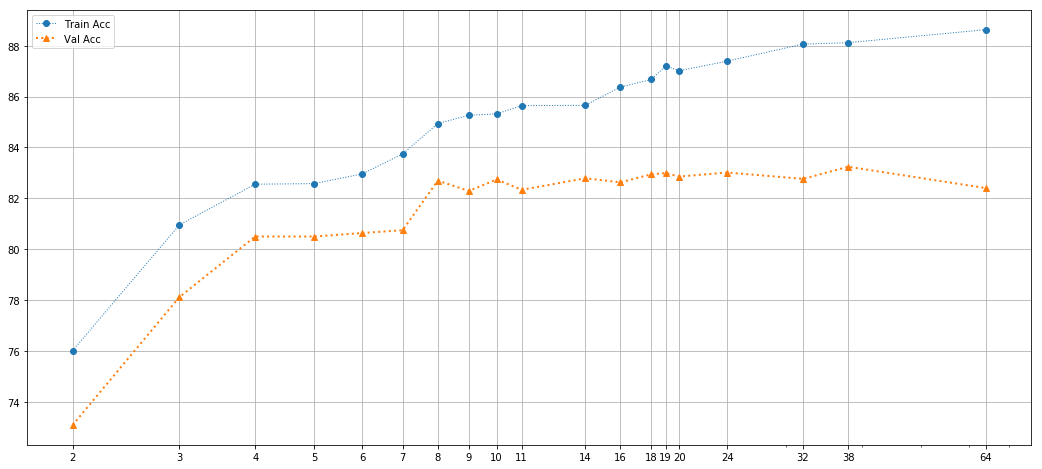

In [8]:
experiment_name = 'global-experiment-cubeedgeEEGNet-weights-same-folds'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = [2, 3, 5, 7, 9, 11, 4, 6, 10, 14, 18, 20, 8, 19, 38, 64, 16, 24, 32]
T = 3
#num_classes = 2

plot_channels_acc(result_path,num_classes,n_ds,n_ch,T,100,same_folds=1, log=True)

In [ ]:
# saved the headset accuracies from headphone_arrangement.ipynb from Michael's plot_nbook

# acc_dict = {'center': np.stack((nch_list_center, acc_gl_center)), 'front': np.stack((nch_list_front, acc_gl_front)), 'back': np.asarray([nch_list_back, acc_gl_back])}
# acc_dict

# npy_file = "../../../../../../../xiaywang/Projects/BCI/memea_extension/eegnet-based-embedded-bci/plot_nbook/headset_acc_{:}class.npy".format(num_classes)

# np.save(npy_file,  acc_dict)    

# my_dict_back = np.load(npy_file)

# print(my_dict_back.item().keys())    
# print(my_dict_back.item().get('center'))

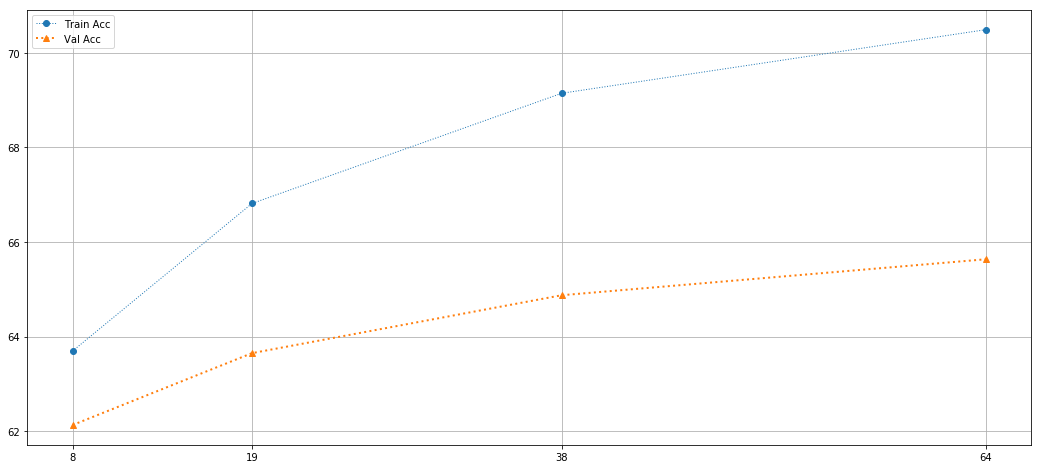

In [13]:
experiment_name = 'global-experiment-cubeedgeEEGNet-weights-same-folds'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = [8, 19, 38, 64]
T = 3
num_classes = 4

plot_channels_acc(result_path,num_classes,n_ds,n_ch,T,100,same_folds=1, log=False)

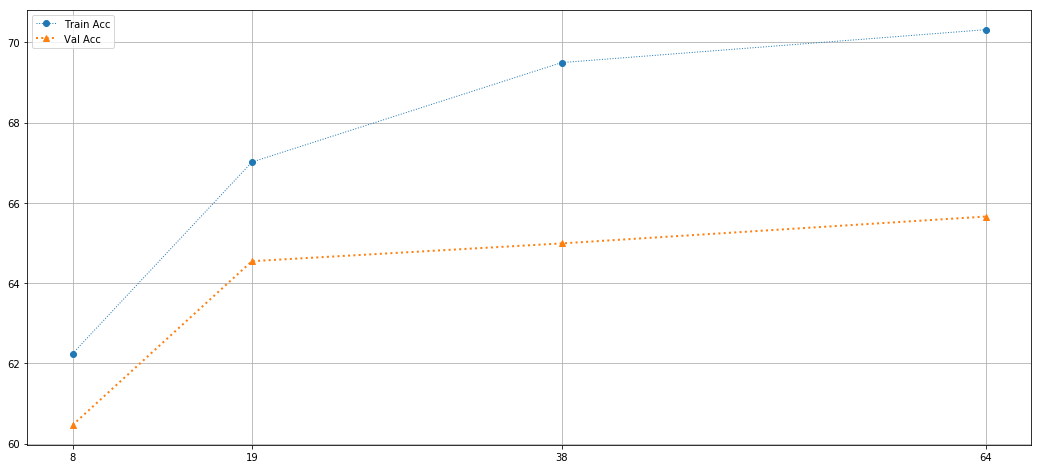

In [14]:
experiment_name = 'global-experiment-cubeedgeEEGNet-weights-same-folds-unitNorm'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = [8, 19, 38, 64]
T = 3
num_classes = 4

plot_channels_acc(result_path,num_classes,n_ds,n_ch,T,100,same_folds=1, log=False)